# Data Science - CMP020N205
## Lab Session 5 -  Numpy and Regression Analysis

### Operations on NumPy arrays
Machine learning algorithms need data to be represented as an **array**. Once our data are represented as arrays, they are **operated** on to either build solutions during the learning stage or to make predictions during the deployment stage.

You are already familiarized with **NumPy arrays**. NumPY arrays are a convenient way to represent homogeneous datasets, e.g, datasets where all the attributes are of the same type, for instance `float` or `int`. In this lab, we will explore some of the most important **mathematical operations** on NumPy arrays. These operations will allow us to implement solutions based on **matrix algebra** and are known as **vectorised operations**, as they operate on a whole array (*vectors*) rather than on individual values at a time.

The main operations that we will cover include:
- Arithmetic operations (addition, subtraction, etc)
- Matrix transposition
- Matrix multiplication
- Matrix inversion

We can use these operations to obtain the least squares solution of several linear and polynomial models. **Before attempting the lab**, make sure that you have read and understood the notes on mathematical notation and basic maths and have reviewed the lecture notes on regression.

### 1. Basic operations on arrays

In this section we will review some of the most important operations on arrays.

First, we will use `np.array` to create a **row vector** `x_r`, specifically a vector consisting of 1 row and 3 columns, and then we will use `np.transpose` to **transpose** it into a **column vector** `x_c` consisting of 3 rows and 1 column:

In [1]:
import numpy as np

In [2]:
x_r = np.array([0, 1, 2], ndmin=2)
print("Vector x_r is:\n", x_r)
print("The shape of x_r is :", x_r.shape)
x_c = np.transpose(x_r)
print("\nVector x_c is:\n", x_c)
print("The shape of x_c is:", x_c.shape)

Vector x_r is:
 [[0 1 2]]
The shape of x_r is : (1, 3)

Vector x_c is:
 [[0]
 [1]
 [2]]
The shape of x_c is: (3, 1)


Note that we could have used `x_c = np.array([[0], [1], [2]])` to produce a column vector directly, instead of producing a row vector and then using transposition.

In [3]:
x_c = np.array([[0], [1], [2]])
print("Vector x_c is:\n", x_c)

Vector x_c is:
 [[0]
 [1]
 [2]]


Let's now use **column stacking** to create a **Matrix**. We will explore how we can design a custom Matrix:


Let's create a **matrix X** that consists 2 columns, specifically a column of ones and another column contains x_c

In [4]:
X = np.column_stack([np.ones(x_c.shape), x_c])
print("The design matrix X is:\n", X)
print("\nThe shape of the matrix X is", X.shape)

The design matrix X is:
 [[1. 0.]
 [1. 1.]
 [1. 2.]]

The shape of the matrix X is (3, 2)


## Question 1
Now, using column stacking, create a Matrix that contains 3 columns. The first column is specifically a column with ones, the second column contains an array that hold values: 2, 3, 4 and the third column contains an array that holds values: 8, 9, 10.

It is not always the case that the first column value has to be ones, but it can be any value we want to bring when we do column stacking. However, if you remember your seminar today, you should be able to recall that we use a matrix in calculations regarding Regression analysis, called **Design Matrix**, in which the first column consisted of only ones. We will be using this matrix we created just now to make Design Matrices frm here onwards.

###  2. Regression: Linear Regression

Let's explore a simple regression problem. First, we will define and plot our training dataset, which consists of 10 samples described by one predictor `x` and one label `y`.

In [5]:
import matplotlib.pyplot as plt

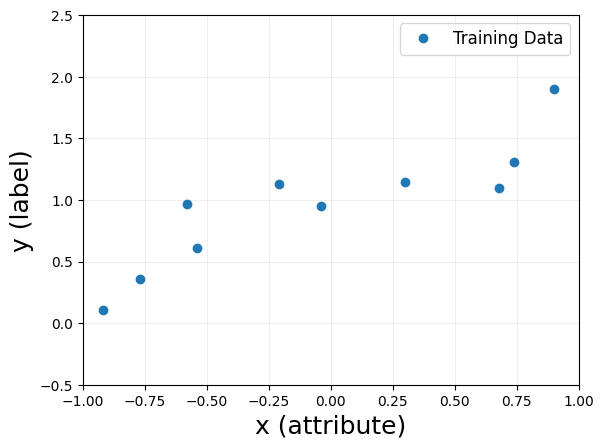

In [6]:
x = np.array([0.3000, -0.7700, 0.9000, -0.0400, 0.7400, -0.5800, -0.9200, -0.2100, -0.5400, 0.6800], ndmin=2).T
y = np.array([1.1492,  0.3582, 1.9013,  0.9487, 1.3096,  0.9646,  0.1079,  1.1262,  0.6131, 1.0951], ndmin=2).T

plt.plot(x, y, 'o', label="Training Data")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1) 
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

Note that here we have obtained the transpose of two row vectors using `.T` instead of `np.transpose`. Both options are equivalent. The most important point is that `x` and `y` are two column vectors consisting of 10 rows and 1 column, i.e. 10x1 vectors:

In [7]:
print(x.shape)
print(y.shape)

(10, 1)
(10, 1)


Also, we can load dataset (**Age Salary Dataset.csv**) in a dataframe from other sources and plot them to get an idea of how they are distributed in the attribute space.

In [8]:
import pandas as pd

In [10]:
df_sal_age = pd.read_csv('./Data/Age Salary Dataset.csv')
df_sal_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     8 non-null      int64
 1   Salary  8 non-null      int64
dtypes: int64(2)
memory usage: 256.0 bytes


In [11]:
print (df_sal_age.columns)
print (df_sal_age.index)

Index(['Age', 'Salary'], dtype='object')
RangeIndex(start=0, stop=8, step=1)


[[18]
 [37]
 [66]
 [25]
 [26]
 [19]
 [68]
 [30]]
[[12000]
 [68000]
 [80000]
 [45000]
 [30000]
 [14000]
 [90000]
 [40000]]


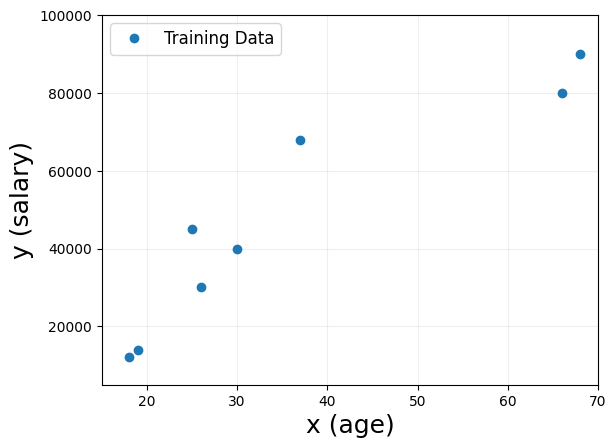

In [12]:
predictor= df_sal_age.iloc[:,0]
x=np.array(predictor, ndmin=2).T
print (x)
label= df_sal_age.iloc[:,1]
y=np.array(label, ndmin=2).T
print (y)

plt.plot(x, y, 'o', label="Training Data")
plt.xlabel("x (age)", fontsize=18)
plt.ylabel("y (salary)", fontsize=18)
plt.xlim(15,70)
plt.ylim(5000,100000)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

### 3. Linear Regression: Optimal Solution

Theoritically, as you have already seen that the best fit line can be obtained with the "Least Squares" solution, let's see how we can implement it programmatically.

### 4.  Least squares

Given a family of regression models, the least squares solution is the model that minimises the mean square error on our training dataset. Consider the folowing **multiple linear model**:

$\begin{equation}
f(x) = w_0 + w_1 x_1 + ... + w_K x_K
\end{equation}$

where $x_1, ..., x_K$ are the predictors and $w_0, ..., w_K$ are the model's parameters. If we have a dataset consisting of $N$ samples, we can obtain the parameters of the least squares solution using the **normal equations** 

$\begin{equation}
\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
\end{equation}$

where $\mathbf{w}=[w_1, ... , w_K]^T$ are the parameters of the model, $\mathbf{y}=[y_0, ..., y_N]^T$ are the true labels in the dataset and $\mathbf{X}$ is the design matrix. The least squares solution for **simple linear regression** can be obtained following an identical approach. Given a linear model

$\begin{equation}
f(x) = w_0 + w_1 x 
\end{equation}$


As you can see from the normal equations, obtaining the least square solution involves: 

- **Arrays** ($\mathbf{w}$, $\mathbf{y}$ and $\mathbf{X}$).
- **Transposition**.
- **Matrix inversion**.
- **Matrix multiplication**. 

Let's obtain the least squares solution for a simple linear model $f(x) = w_0 + w_1 x$. We need to calculate the design matrix first and then use the normal equation. We will show the calculations involved in the normal equations step by step:

Step 1:  $X^TX$

Step 2: $(X^TX)^{-1}$

Step 3: $(X^TX)^{-1}X^T$

In [13]:
X = np.column_stack([np.ones(x.shape), x])
print("The design matrix is:\n", X)
XTX = np.dot(X.T, X) # Step 1
XTX_inv = np.linalg.inv(XTX) # Step 2
XTX_invXT = np.dot(XTX_inv, X.T) # Step 3

w = np.dot(XTX_invXT, y)
print("The 2 parameters of the least squares linear solution are\n", w)

The design matrix is:
 [[ 1. 18.]
 [ 1. 37.]
 [ 1. 66.]
 [ 1. 25.]
 [ 1. 26.]
 [ 1. 19.]
 [ 1. 68.]
 [ 1. 30.]]
The 2 parameters of the least squares linear solution are
 [[-1891.94507804]
 [ 1363.79086721]]


Now that we have the parameters $w_0$ and $w_1$ of the linear model, we can use them to carry out predictions. Let's predict the salary for people of age 20,23,29,49,50,70. Since the predicted values will lie on the trend-line producted by our least squares solution function, we will use thos value tp plot the line in the attribute space.

[20 23 29 49 50 70]
[[25383.8722662 ]
 [29475.24486784]
 [37657.99007111]
 [64933.80741536]
 [66297.59828257]
 [93573.41562682]]


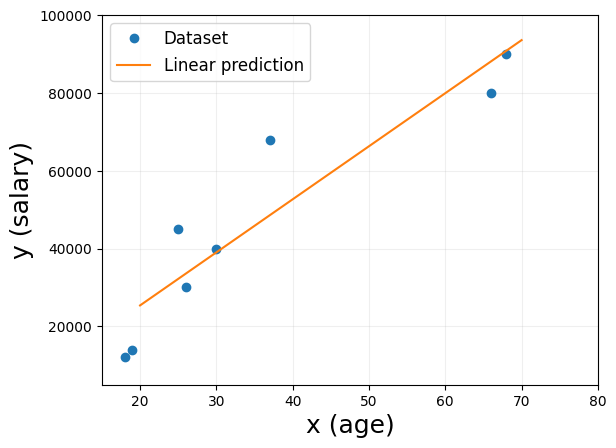

In [14]:
x_arr = np.array([20,23,29,49,50,70]).T
X_arr = np.column_stack([np.ones(x_arr.shape), x_arr])
y_arr = np.dot(X_arr, w)

print(x_arr)
print(y_arr)

plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_arr, y_arr, label="Linear prediction")
plt.xlabel("x (age)", fontsize=18)
plt.ylabel("y (salary)", fontsize=18)
plt.xlim(15,80)
plt.ylim(5000,100000)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

## Question 2
Let's go back to the first regression example you have seen today, where x was the predictor and y was the label with training data as:


x = [0.3000, -0.7700, 0.9000, -0.0400, 0.7400, -0.5800, -0.9200, -0.2100, -0.5400, 0.6800]

y=[1.1492,  0.3582, 1.9013,  0.9487, 1.3096,  0.9646,  0.1079,  1.1262,  0.6131, 1.0951]

You are now to find the optimal solution for this given dataset and display the linear regression line with proper plotting of the datapoints that are given below:
x_test=[0.2000, 0.990, 0.3450, -0.9910, -0.2480, 0.1000, 0.9120, 0.7450, 0.3450, -0.1000]


## Question 3

Now, you are given with another dataset (**House Price Dataset.csv**) that contains the price (in thousand £) and size (in sq. feet) of the houses. 

Find the prices for the houses of the following sizes:
2000, 1200, 1480, 2200, 1890, 1050, 2390

Also, draw the trend-line using the predicted values.

### 5. Multiple Linear Regression
If there are are more than one predictor involved then the regression we do is a Multiple Linear Regression.

Assuming we are now predicting house prices which is related to two predictors (**House Price Bedroom Dataset.csv**), where one of them is size and the other one is no. of Bedrooms.

In [18]:
df_house_bed_price = pd.read_csv('./Data/House Price Bedroom Dataset.csv')
df_house_bed_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Price            10 non-null     int64
 1   No. of Bedrooms  10 non-null     int64
 2   Size             10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


In [20]:
predictor1= df_house_bed_price.iloc[:,1]
predictor2= df_house_bed_price.iloc[:,2]
x1=np.array(predictor1, ndmin=2).T
x2=np.array(predictor2, ndmin=2).T
print (x1)
print (x2)

label= df_house_bed_price.iloc[:,0]
y=np.array(label, ndmin=2).T
print (y)

[[2]
 [2]
 [3]
 [2]
 [1]
 [2]
 [3]
 [3]
 [1]
 [2]]
[[1400]
 [1600]
 [1700]
 [1875]
 [1100]
 [1550]
 [2350]
 [2450]
 [1425]
 [1700]]
[[245]
 [312]
 [279]
 [308]
 [199]
 [219]
 [405]
 [324]
 [319]
 [255]]


Now, using the predictors x1 & x2 we can make a new Design Matrix that has N x 4 dimension. Unsing this new Design Matrix and the given labels we can get the parameter values for the least squares solution for this multiple linear regression.

In [21]:
X = np.column_stack([np.ones(x1.shape), x1, x2])
print("The design matrix is:\n", X)
XTX = np.dot(X.T, X) # Step 1
XTX_inv = np.linalg.inv(XTX) # Step 2
XTX_invXT = np.dot(XTX_inv, X.T) # Step 3

w = np.dot(XTX_invXT, y)
print("The 3 parameters of the least squares linear solution are\n", w)

The design matrix is:
 [[1.000e+00 2.000e+00 1.400e+03]
 [1.000e+00 2.000e+00 1.600e+03]
 [1.000e+00 3.000e+00 1.700e+03]
 [1.000e+00 2.000e+00 1.875e+03]
 [1.000e+00 1.000e+00 1.100e+03]
 [1.000e+00 2.000e+00 1.550e+03]
 [1.000e+00 3.000e+00 2.350e+03]
 [1.000e+00 3.000e+00 2.450e+03]
 [1.000e+00 1.000e+00 1.425e+03]
 [1.000e+00 2.000e+00 1.700e+03]]
The 3 parameters of the least squares linear solution are
 [[ 88.34991804]
 [-27.01754893]
 [  0.14862212]]


Now that we have the parameters for the least squares solution for this multiple linear regression, we can carry out predictions such finding prices for houses with the following no. of beds and size touples:
(2, 1300), (5, 3000), (1, 1100), (2, 1350), (3, 2500) 

In [22]:
x1_arr = np.array([2, 5, 1, 2, 3]).T
x2_arr = np.array([1300, 3000, 1100, 1350,2500]).T

X_arr = np.column_stack([np.ones(x1_arr.shape), x1_arr,x2_arr])
y_arr = np.dot(X_arr, w)

#print(x_arr)
print("So the house prices are:")
print(y_arr)

So the house prices are:
[[227.52357535]
 [399.12853148]
 [224.81670041]
 [234.95468132]
 [378.85256967]]
